project-005-20  
# How to Diagnose a Patient's Heart Disease Through Medical Examination (Medical Measurement)

# Exploratory Data Analysis:
---
### Loading libaray needed:

In [2]:
### Run this cell before continuing.
library(tidyverse) #function that allows us to import our excel files in csv format
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6) 
library(dplyr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Load and wrangle data set
---
#### Clean the date set 
- adding columns name
- change sex from (1,0) to male vs female
- change the Range of num from (0-4) to (0-1).
   - Our main task is to classify to presence or absence of heart disease rather than the 4 levels of heart disease. 
   - Therefore, transform the heart disease level from 0 (0, absence of heart disease) to 1 (1,2,3,4 presence of heart disease)
   
   
Noted that every varible has its own column and each row is a single observation, each value is in the single cell. Therefore the date itself is a tidy data. 

In [3]:
#use download.file to read dataset from the web into R
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland.csv")
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) 
heart_disease_data
print("DataSet 1 : The raw data set")


#rename the columns name
heart_disease_data <- heart_disease_data |>
                       rename( age = X1,
                               sex = X2,
                               chest_pain_type = X3,
                               resting_bp = X4,
                               cholestrol = X5,
                               fbs = X6,
                               rest_ecg = X7,
                              max_heart_rate = X8,
                              exercise_angina =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              heart_disease = X14)

#create heart_disease_diagnosism columns which transfrom from num with 0-1 values. 
heart_disease_data <- mutate(heart_disease_data, heart_disease_diagnosis = case_when(heart_disease == 0 ~ 0,
                                                                     heart_disease == 1| heart_disease == 2 | heart_disease == 3| heart_disease == 4 ~ 1))

#change the sex from binary to male VS female. 
heart_disease_data <- mutate(heart_disease_data, sex = case_when(sex == 0 ~ "male",sex == 1 ~ "female"))

#change thal (Predictors) columns to numerical and heart_disease_diagnosis (Our class) to factor.
heart_disease_data <- heart_disease_data |> mutate(thal = as.numeric(thal),heart_disease_diagnosis = as.factor(heart_disease_diagnosis))

#Remove the varible we dont want 
heart_disease_data <- heart_disease_data |> mutate(thal = as.numeric(thal),heart_disease_diagnosis = as.factor(heart_disease_diagnosis))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


[1] "DataSet 1 : The raw data set"


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [4]:
heart_disease_data
print("Data Set 2 : Cleaned data set ")

age,sex,chest_pain_type,resting_bp,cholestrol,fbs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,heart_disease,heart_disease_diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6,0,0
67,female,4,160,286,0,2,108,1,1.5,2,3.0,3,2,1
67,female,4,120,229,0,2,129,1,2.6,2,2.0,7,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3,1,1
38,female,3,138,175,0,0,173,0,0.0,1,?,3,0,0


[1] "Data Set 2 : Cleaned data set "


### Split Data into traning Set and testing set.
Data Set was split into a training set and a testing set where the training Set is 75% of the original dataset and the testing Set is 25% of the original dataset.

In [5]:
set.seed(1231) # make sure reproducibility 
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = heart_disease_diagnosis)   
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

## summarize the data
----

In [6]:
num_of_observation <- nrow(hd_train)
num_of_observation 
print("we have 227 observation in our traning Set")
num_of_heart_disease <- hd_train |> 
                        group_by(heart_disease_diagnosis) |> 
                        summarise(percentage = n()/227)

num_of_heart_disease
print("Table 1: Distribution of heart disease diagnosis")
num_of_sex <- hd_train |> 
                        group_by(sex) |> 
                        summarise(percentage = n()/227)
num_of_sex
print("Table 2: Distribution of sex")

[1] 227

[1] "we have 227 observation in our traning Set"


heart_disease_diagnosis,percentage
<fct>,<dbl>
0,0.5418502
1,0.4581498


[1] "Table 1: Distribution of heart disease diagnosis"


sex,percentage
<chr>,<dbl>
female,0.6872247
male,0.3127753


[1] "Table 2: Distribution of sex"


For table 1  
In our training data set, the group of people with absence heart disease and The group of presence have a close amount of total number  

For table 2,   
The female is the majority sex, 69%. Since sex is imblanced in our data, we exlude it because it may cause classifor has baised output

In [7]:
sumOfData <- hd_train |> 
             select(age,resting_bp,cholestrol,max_heart_rate) |>
             summary()
sumOfData
print("Table 3 for important numerical varibles")

      age          resting_bp      cholestrol    max_heart_rate 
 Min.   :29.00   Min.   : 94.0   Min.   :126.0   Min.   : 88.0  
 1st Qu.:48.00   1st Qu.:120.0   1st Qu.:212.0   1st Qu.:132.0  
 Median :56.00   Median :130.0   Median :243.0   Median :151.0  
 Mean   :54.71   Mean   :131.4   Mean   :247.7   Mean   :148.6  
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:274.5   3rd Qu.:165.0  
 Max.   :77.00   Max.   :192.0   Max.   :564.0   Max.   :202.0  

[1] "Table 3 for important numerical varibles"


**Analysing summary table**

For age, we can see our Range is from 29 years old to 76 years old. Observations are all adults, and the majority are around 50 years old or elder.

For resting blood pressure (resting_bp), the normal range for resting blood pressure is **under 120**. From the summary table, we can observe the majority of observations have higher blood pressure than normal health standards. 

For cholesterol level (cholestrol),by the graph, the mean value gives a 245.1 mg/dl cholesterol level which is considered a high cholesterol level. We can assume that majority of our observation has a high cholesterol level


<img src="chol-chart.png"  width="30%" height="30%">

In [8]:
print("Find and Remove Missing Value")

(num_of_missing_columns <- sum(is.na(hd_train)))
## Noted that there is 2 NA values in training data
(num_of_missing_columns <- sum(is.null(hd_train)))
## Noted that there is no Null values in traning data. 

(row_with_question <- hd_train |> 
                    filter(ca == "?"))
## Noted that there is 3 row with "?" in variable ca, which means they dont have measurement of the ca 
print("Data Set 3 : Row with value ? ")

## We should filter out those 3 row in our traning Set 
hd_train <- hd_train |>
            filter(ca != "?") |> 
            drop_na() #remove row that contains NA value. 

[1] "Find and Remove Missing Value"


[1] 2

[1] 0

age,sex,chest_pain_type,resting_bp,cholestrol,fbs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,heart_disease,heart_disease_diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
52,female,3,138,223,0,0,169,0,0.0,1,?,3,0,0
58,female,2,125,220,0,0,144,0,0.4,2,?,7,0,0
43,female,4,132,247,1,2,143,1,0.1,2,?,7,1,1


[1] "Data Set 3 : Row with value ? "


  

## Data Visualization 
---

### Use rough regression to analyzing the relationship between variables and heart disease
---

#### Create Linear regression

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



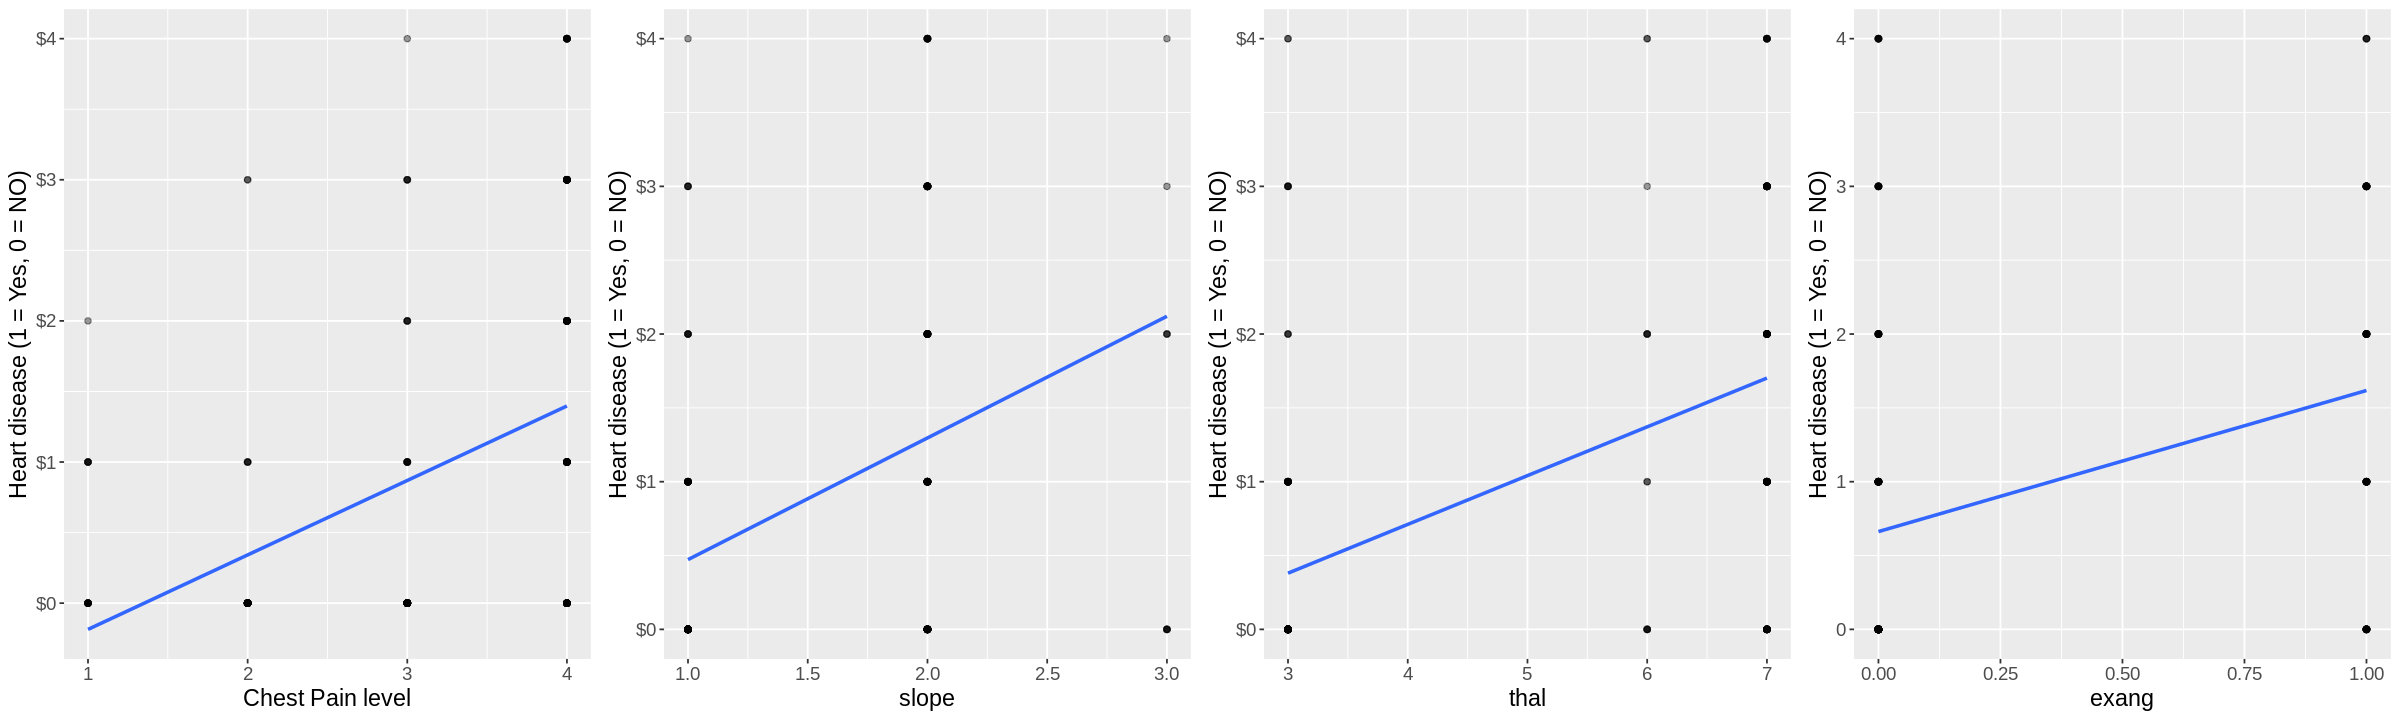

In [25]:
options(repr.plot.width = 20,repr.plot.height =6)
lm_plot_chest_pain_type <- ggplot(hd_train, aes(x = chest_pain_type, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("Chest Pain level") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_slope <- ggplot(hd_train, aes(x = slope, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("slope") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_thal <- ggplot(hd_train, aes(x = thal, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("thal") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_exang <- ggplot(hd_train, aes(x = exercise_angina, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("exang") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous() +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))
plot_grid(lm_plot_chest_pain_type,lm_plot_slope,lm_plot_thal,lm_plot_exang, nrow = 1)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



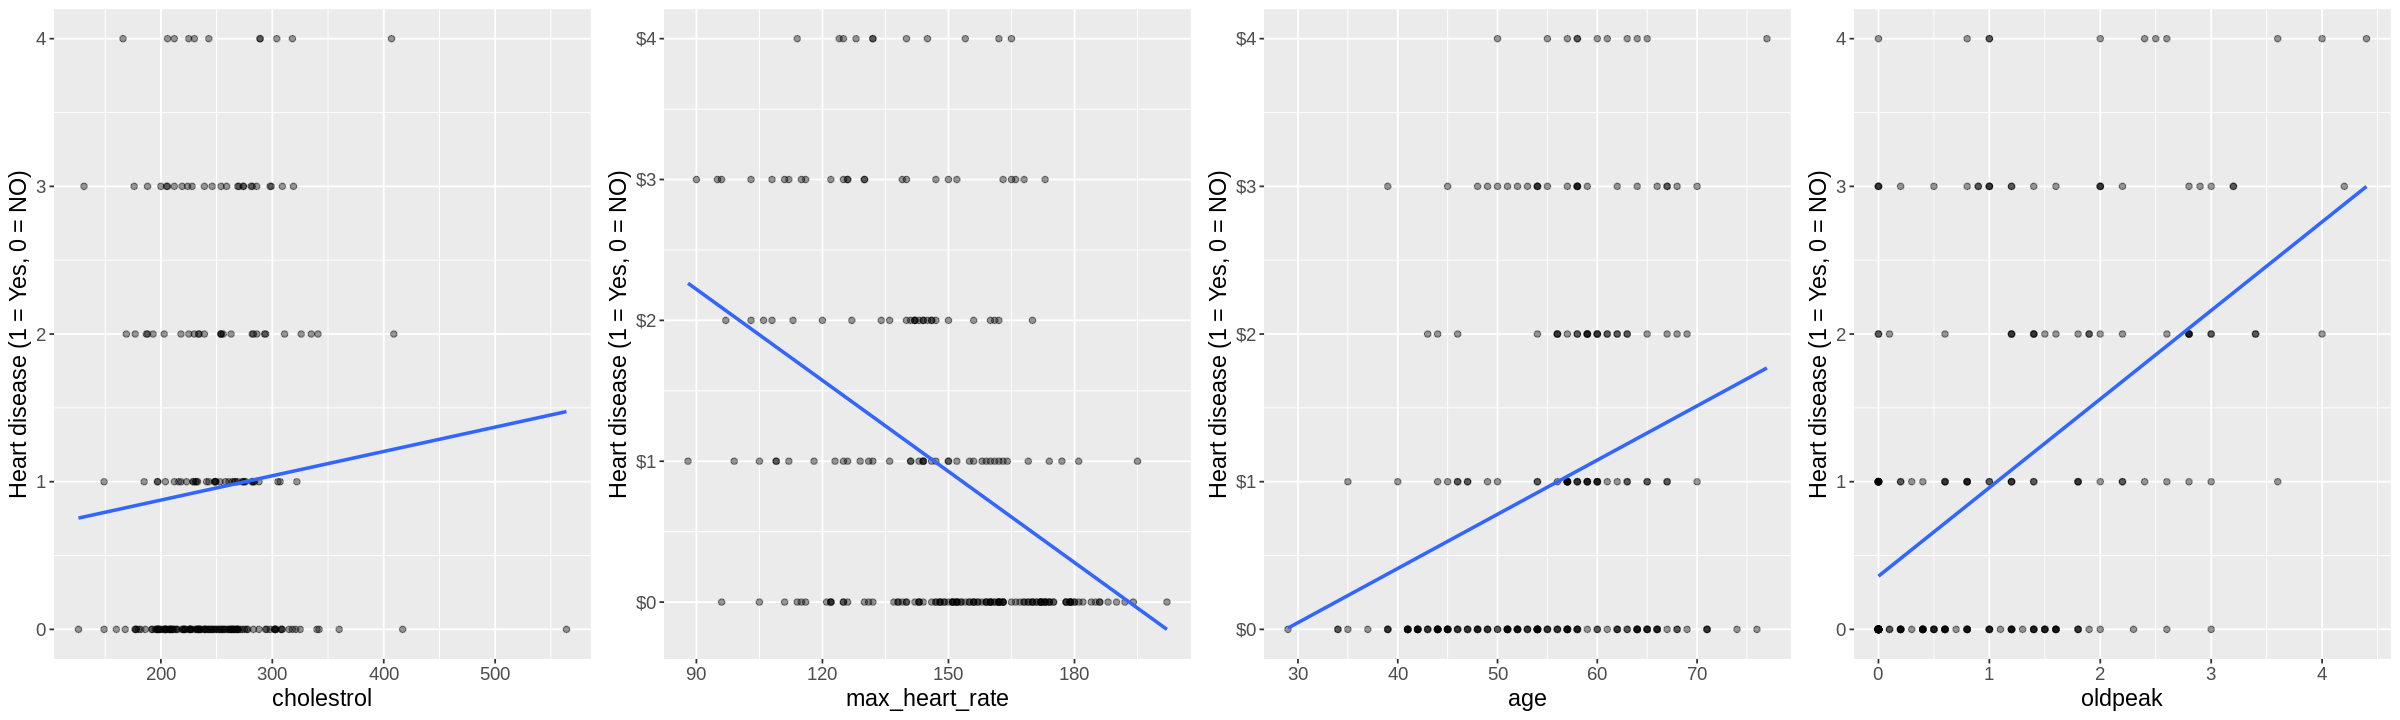

In [26]:

options(repr.plot.width = 20,repr.plot.height =6)


lm_plot_cholestrol <- ggplot(hd_train, aes(x = cholestrol, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("cholestrol") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_max_heart_rate <- ggplot(hd_train, aes(x = max_heart_rate, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("max_heart_rate") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_age <- ggplot(hd_train, aes(x = age, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("age") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))


lm_plot_oldpeak <- ggplot(hd_train, aes(x = oldpeak, y = heart_disease)) +
  geom_point(alpha = 0.4) +
  xlab("oldpeak") +
  ylab("Heart disease (1 = Yes, 0 = NO)") +
  scale_y_continuous() +
  geom_smooth(method = "lm", se = FALSE) + 
  theme(text = element_text(size = 14))
plot_grid(lm_plot_cholestrol,lm_plot_max_heart_rate,lm_plot_age,lm_plot_oldpeak, nrow = 1)




#### Analyzation on histogram
For histogram 1, see the shape of heart disease group and non heart disease group there is no different. That may because cholestrol also related to age where as the age of our observation is around the same, 40-60.  

For histogram 2, Noted that the histogram of no-heart disease group skewed to the left whereas the histogram of heart disease group skwed to the right. There may be evidence that the presence of heart disease bounds with low heart rate.   

For histogram 3, see the shape of heart disease group is aproximated symmetry  and non heart disease group there is slightly left-skewed. The heart disease group has a higher avergae age.

For histogram 4, Noted that the histogram of no-heart disease group extremely skewed to the right whereas the histogram of heart disease group slightly skwed to the right. There may be evidence that the presence of heart disease bounds with high old peak.   

# KNN classification Algorithm
----

### Cross Validation to Choose Best K Value 

In [141]:
#recipe with data removed fbs, restecg, ca columns
set.seed(1231) 

#create recipe
knn_recipe <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + cholestrol + max_heart_rate + exercise_angina + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

#create the tuning model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |>
set_mode("classification") 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.8158586,5,0.02965279,Preprocessor1_Model09
10,accuracy,binary,0.8158586,5,0.02965279,Preprocessor1_Model10
11,accuracy,binary,0.8157576,5,0.02807572,Preprocessor1_Model11
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,accuracy,binary,0.7525253,5,0.02047231,Preprocessor1_Model04
1,accuracy,binary,0.7027273,5,0.01936893,Preprocessor1_Model01
2,accuracy,binary,0.7027273,5,0.01936893,Preprocessor1_Model02


[1] "Table 4. Cross model Model Estimated Accuracies for K = 1 to 12"


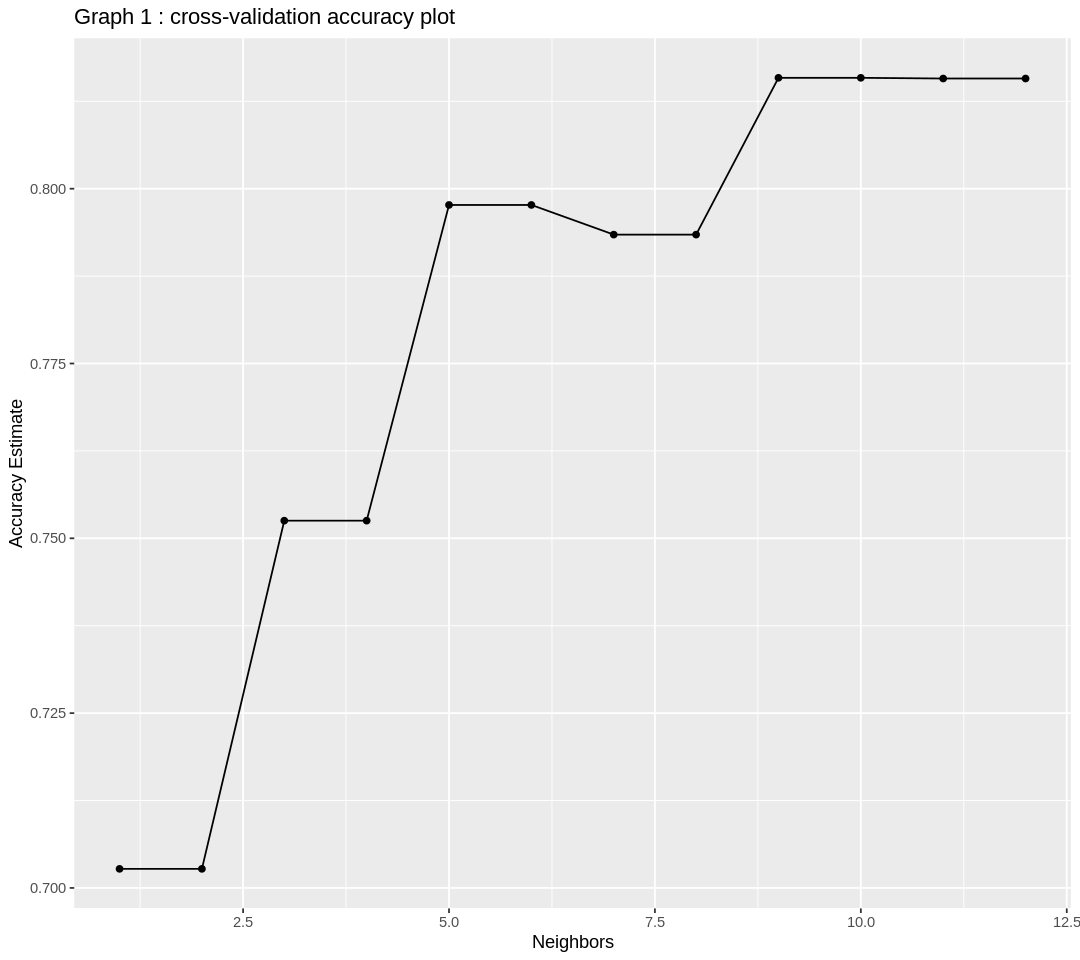

In [142]:
set.seed(1231) 

# create 5 fold traning data
knn_vfold <- vfold_cv(hd_train, v = 5, strata = heart_disease_diagnosis)

# tuning from K = 1 to K = 12
gridvals <- tibble(neighbors = seq(from = 1, to =12))

# collecting summary on different K value cross validation 
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() 

# collecting avg accuarcy with different K value
accuracies <- knn_results |> 
       filter(.metric == "accuracy") |>
       arrange(desc(mean))
accuracies

print("Table 4. Cross model Model Estimated Accuracies for K = 1 to 12")
options(repr.matrix.max.rows = 6)

# visualizing avg accuarcy with different K value
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Graph 1 : cross-validation accuracy plot")

options(repr.plot.width = 9,repr.plot.height =8)
cross_val_plot

**K value**  
We are choosing **K = 10** as our final model because it has the highest accuracy among k = 1 to k = 12 tuning values. Besides, moving a bit right or left from K = 10, accuracy tends to be stable without a huge decrease or increase around.  

## Final Model 
---

In [143]:
#Create final model with K = 10
set.seed(1231) # make sure reproducibility
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
set_engine("kknn") |>
set_mode("classification") 

knn_fit <- workflow() |>
add_recipe(knn_recipe) |>
add_model(knn_spec) |>
fit(data = hd_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1981982
Best kernel: rectangular
Best k: 10

In [144]:
#testing model predictions with testing set

set.seed(1231) # make sure reproducibility

test_predictions <- predict(knn_fit,hd_test) |>
bind_cols(hd_test)

knn_metrics <- test_predictions |>
metrics(truth = heart_disease_diagnosis, estimate = .pred_class)
knn_metrics

print("Table 5. KNN metrics")

#accuracy seems unaffected when applying model to testing dataset

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8552632
kap,binary,0.7081006


[1] "Table 5. KNN metrics"


### Final estimate accuracy 
Our final model has an accuracy of 0.85 on the test model. 

---
## Curse of Dimensionality Issue
---
Due to the high number of explanatory variables, our model may suffer from the "curse of dimensionality", as we only have 222 samples of data for a model that exists in a 9-dimensional space. Thus, the distances between many datapoints may be very far from each other, resulting in inaccurate predictions.  
To address this, we could use MFA (muliple factor analysis), a combination of PCA (principle component analysis) and MCA (multiple correspondence analysis), in order to determine the most significant explanatory variables for our model. However, this requires additional libraries and is also outside the scope of this course, so instead, we conducted some research on which variables are historically more significant at explaining heart disease.  
  
We know both blood pressure and cholesterol are common indicators of heart disease, so we should keep these variables. However, in this study, cholesterol was measured as a total, as opposed to separate metrics for HDL (Protective against heart disease) and LDL (A cause of heart disease), and thus we will test a model excluding the variable.  
  
Also, a common test for heart disease in diagnosis are an ECG, however we exclude this variable in favour of specifics of the ECG, which include oldpeak and slope, referencing the ST-segment specifically. As oldpeak is the ST-segment depression induced by exercise, this may be correlated to the chest pain induced by exercise (exang), so we will test a model excluding this variable.
  
We can test a model excluding the chest pain type (cp) variable, as that is highly subjective and our model is predicting the existence of any chest pain, irrespective of type, for which this variable may be redundant information. 

In [ ]:
#Model excluding cholesterol
knn_recipe_no_chol <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + max_heart_rate + exercise_angina + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_chol <- workflow() |>
    add_recipe(knn_recipe_no_chol) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_chol <- predict(knn_fit_no_chol,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_chol
print("Table 6 : Model excluding cholesterol")

#Model excluding exercise_angina
knn_recipe_no_exang <- recipe(heart_disease_diagnosis ~ age + chest_pain_type + resting_bp + cholestrol + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_exang <- workflow() |>
    add_recipe(knn_recipe_no_exang) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_exang <- predict(knn_fit_no_exang,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth = heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_exang
print("Table 7 : Model excluding exercise_angina")

#Model excluding chest_pain_type
knn_recipe_no_chest_pain_type <- recipe(heart_disease_diagnosis ~ age + resting_bp + cholestrol + exercise_angina + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_fit_no_cp <- workflow() |>
    add_recipe(knn_recipe_no_chest_pain_type) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_cp <- predict(knn_fit_no_cp,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)

knn_metrics_no_cp
print("Table 8 : Model excluding chest_pain_type")
#Model excluding all three
knn_recipe_no_all <- recipe(heart_disease_diagnosis ~ age + resting_bp + max_heart_rate + oldpeak + slope + thal,
                    data = hd_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())
 
knn_fit_no_all <- workflow() |>
    add_recipe(knn_recipe_no_all) |>
    add_model(knn_spec) |>
    fit(data = hd_train)

knn_metrics_no_all <- predict(knn_fit_no_all,hd_test) |>
    bind_cols(hd_test) |>
    metrics(truth =heart_disease_diagnosis, estimate = .pred_class)
knn_metrics_no_all
print("Table 9 : Model excluding all three")

### Conclusion
As we can see from the tables above, it seems that no variables are redundant to the model fit, and reducing the dimensionality through this method would result in a **loss of accuracy** on the testing set. Thus, we continue with the original model with 9 predictors.

# Discussion:
---

rubric:  
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

<span style="color:red">
**Need explaination**
</span>

# References
--- 
<span style="color:red">
**Need explaination**
</span>